In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skpe
import sklearn.metrics as sklm
import sklearn.model_selection as ms
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm
import scipy.stats as stats
import numpy.random as nr
import sklearn.neighbors as neighbors
import xgboost as xgb
import lightgbm as lgb

In [3]:
path1 = "../input/titanic/train.csv"
train = pd.read_csv(path1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
path2 = "../input/titanic/test.csv"
test = pd.read_csv(path2)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.info())
print("\n")
print("--------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Let's look at the target variable first
train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

*I have made a theory about what features could have been responsible in saving a person's life in that situation:*

* Women and children would have been given a high preference than men(Sex and Age).
* Preference would have been given in accordance of their status and money(Pclass and Fare)

*Also, there could be many more, we will find out later in this notebook, when we will do Feature Engineering.*

# Univariate Analysis

* Age

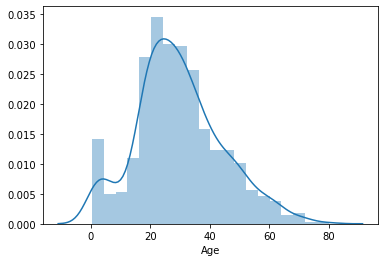

In [9]:
sns.distplot(train['Age'])

*Most of the passengers are between the age of 20-40.*

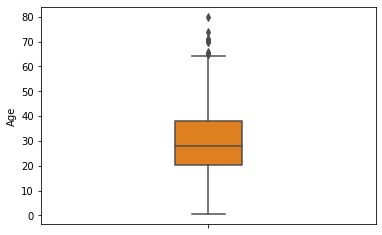

In [10]:
sns.boxplot(y=train['Age'], data=train, width=0.2, palette='autumn')

*Looking at this plot, we have a pretty rough idea about the inter-quartile range, median and the outliers.*

* Fare

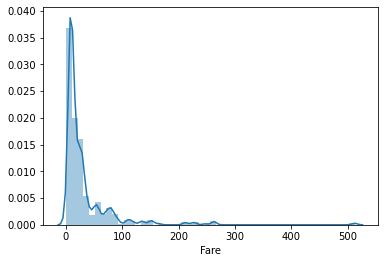

In [11]:
sns.distplot(train['Fare'])

*Most people were travelling with almost no Fare.There could be two reasons to explain this:-*

* Either they were a part of crew working in the ship
* Or, they could be a trespasser(like Jack!! in the movie).

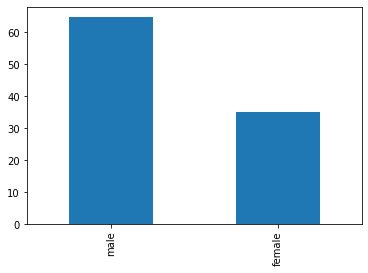

In [12]:
# Let's look at the sex ratio.
(train['Sex'].value_counts()/len(train['Sex'])*100).plot.bar()

*With almost 65% men onboard, clearly women were in minority. But, women were given major preference at the time of sinking of ship.*

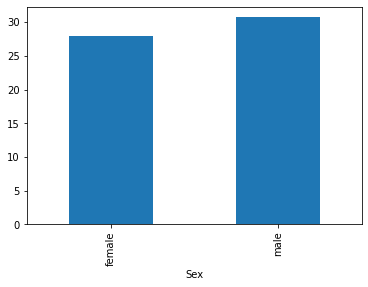

In [13]:
# Mean age of both sex groups
train.groupby('Sex')['Age'].mean().plot.bar()

In [14]:
# Performing ch-square test to know how different both sex groups are
stats.chi2_contingency(pd.crosstab(train['Sex'], train['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

*First value is chi-square value and the second one is the p-value(<0.05 in order to be statistically different). *

# Bivariate Analysis

In [15]:
# Now, let's look at how gender affected the survival rate of passengers
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


*We can clearly see that women have a better survival rate(74.2%) than men(18.9%).*

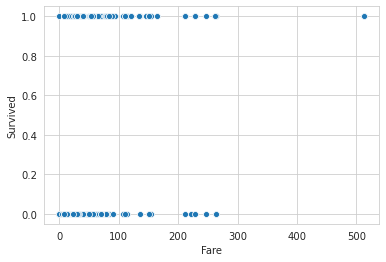

In [16]:
# Relationship between survived and fare
sns.set_style(style='whitegrid')
sns.scatterplot(x='Fare', y='Survived', data=train)

In [17]:
train = train.drop(train[((train['Fare'] > 500) & (train['Survived'] > 0.8))].index)

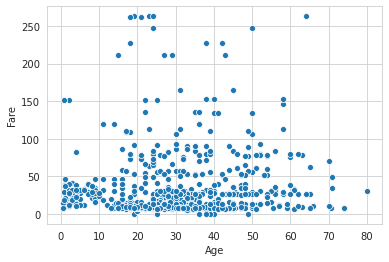

In [18]:
# Relationship between fare and age
sns.scatterplot(x='Age', y='Fare', data=train, legend='brief')

*There are two points above the 500 fare mark which are not following the usual trend.*

In [19]:
train = train.drop(train[((train['Fare'] > 500) & (train['Age'] > 30))].index)

**Let's look at the the relationship of other features with age.**

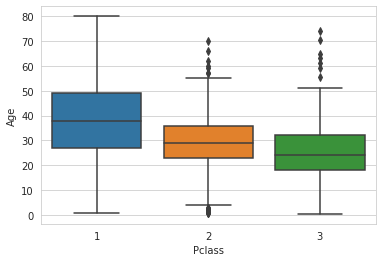

In [20]:
sns.boxplot(data=train, y='Age', x='Pclass')

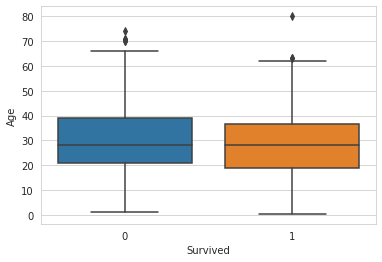

In [21]:
sns.boxplot(data=train, y='Age', x='Survived')

*The median of both(survived or not survived) with age is almost same(28 approx.)*

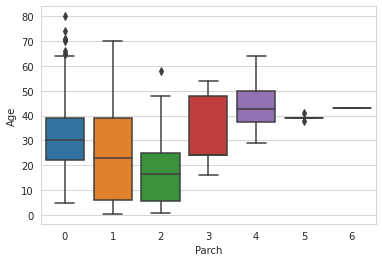

In [22]:
sns.boxplot(data=train, y='Age', x='Parch')

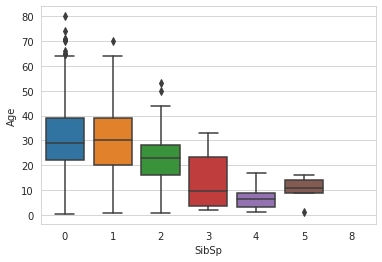

In [23]:
sns.boxplot(data=train, y='Age', x='SibSp')

*It seems that Pclass, SibSp and Parch are showing wide variations age variable.*

# Variable Transformation

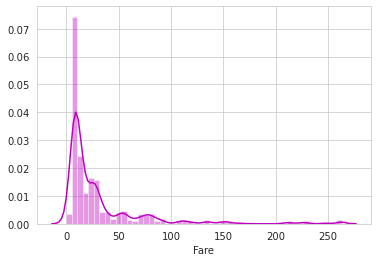

In [24]:
# Checking distribution of fare
sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))

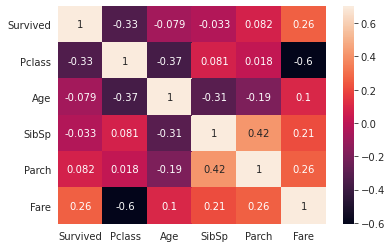

In [25]:
# Checking correlation bw different variables
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=.7, cbar=True, annot=True)

*It seems that the variable Survived is not a variable which gets along with any of them.*

In [26]:
corr = train.corr()

# Sort in descending order
corr_top = corr['Survived'].sort_values(ascending=False)[:10]
top_features = corr_top.index[1:]
print(corr_top)

Survived       1.000000
Fare           0.261742
Parch          0.082157
PassengerId   -0.006916
SibSp         -0.033395
Age           -0.079472
Pclass        -0.334068
Name: Survived, dtype: float64


**Let's see how survival rate is affected by features(objects):** 
1. Pclass
2. Sex
3. SibSp
4. Parch
5. Embarked

In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.624413
2,0.472826
3,0.242363


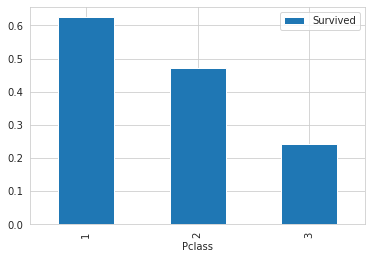

In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

In [29]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.741214
male,0.186087


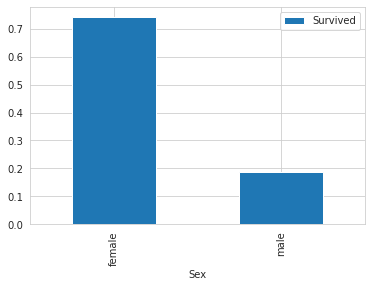

In [30]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

In [31]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.545455
Q,0.389610
S,0.336957


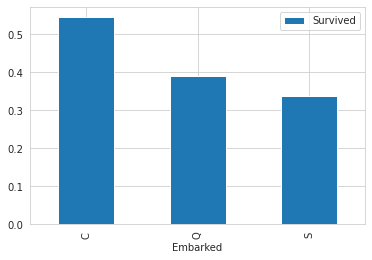

In [32]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

In [33]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.342149
3,0.250000
4,0.166667
5,0.000000
8,0.000000


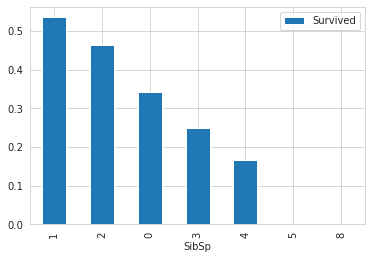

In [34]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

In [35]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.547009
2,0.500000
0,0.341716
5,0.200000
4,0.000000
6,0.000000


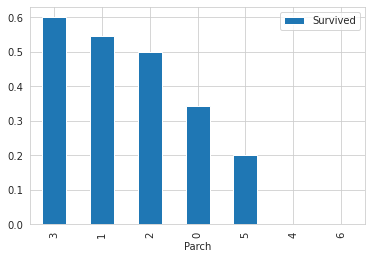

In [36]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False).plot(kind='bar')

# Outliers

In [37]:
""""Q1 = []
Q3 = []
Lower_Bound = []
Upper_Bound = []
Outliers = []

for i in top_features:
    
    # 25th and 75th percentiles
    q1, q3 = np.percentile(train[i], 25), np.percentile(train[i], 75)
    
    # Interquartile range
    iqr = q3 - q1
    
    # Outlier cutoff
    cut_off = 1.5*iqr
    
    # Lower and upper bounds
    lower_bound = q1 - cut_off
    upper_bound = q3 + cut_off
    
    # Save outlier indexes
    outlier = [x for x in train.index if train.loc[x,i] < lower_bound or train.loc[x,i] > upper_bound]
    
    # Append values for dataframe
    Q1.append(q1)
    Q3.append(q3)
    Lower_Bound.append(lower_bound)
    Upper_Bound.append(upper_bound)
    Outliers.append(len(outlier))
    
    try:
        train.drop(outlier, inplace=True, axis=0)
        
    except:
        continue
        
df_out = pd.DataFrame({'column':top_features,'Q1':Q1,'Q3':Q3,'Lower_Bound':Lower_Bound,'Upper_Bound':Upper_Bound,'No. of Outliers':Outliers})
df_out.sort_values(by='No. of Outliers', ascending=False)"""

'"Q1 = []\nQ3 = []\nLower_Bound = []\nUpper_Bound = []\nOutliers = []\n\nfor i in top_features:\n    \n    # 25th and 75th percentiles\n    q1, q3 = np.percentile(train[i], 25), np.percentile(train[i], 75)\n    \n    # Interquartile range\n    iqr = q3 - q1\n    \n    # Outlier cutoff\n    cut_off = 1.5*iqr\n    \n    # Lower and upper bounds\n    lower_bound = q1 - cut_off\n    upper_bound = q3 + cut_off\n    \n    # Save outlier indexes\n    outlier = [x for x in train.index if train.loc[x,i] < lower_bound or train.loc[x,i] > upper_bound]\n    \n    # Append values for dataframe\n    Q1.append(q1)\n    Q3.append(q3)\n    Lower_Bound.append(lower_bound)\n    Upper_Bound.append(upper_bound)\n    Outliers.append(len(outlier))\n    \n    try:\n        train.drop(outlier, inplace=True, axis=0)\n        \n    except:\n        continue\n        \ndf_out = pd.DataFrame({\'column\':top_features,\'Q1\':Q1,\'Q3\':Q3,\'Lower_Bound\':Lower_Bound,\'Upper_Bound\':Upper_Bound,\'No. of Outliers\':Out

In [38]:
# Now, look at the size of this dataset
train.shape

(888, 12)

# Feature Transformation

In [39]:
# Saving train rows
ntrain = train.shape[0]

# Save the target variable
target = train['Survived']

# Drop Id and SalePrice from train dataframe
train.drop(['PassengerId', 'Ticket', 'Survived'], inplace=True, axis=1)

# Store test Id
test_Id = test['PassengerId']

# Drop test Id
test.drop(['PassengerId', 'Ticket'], inplace=True, axis=1)

# Concatenate train and test dataframes
train = pd.concat([train, test])

# Missing Data

In [40]:
train.isnull().sum().sort_values(ascending=False)

Cabin       1013
Age          263
Embarked       2
Fare           1
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
dtype: int64

In [41]:
# Filling Cabin with most frequent occurences
train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)

# Getting the first letter of the cabin as the cabin name
def take_section(code):
    return code[0]
train['Cabin'] = train['Cabin'].apply(take_section)

# Converting all cabin categories into numericals
train['Cabin'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],[2,1,4,7,6,5,3,0], inplace=True)

# Filling Embarked with most frequent occurences
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Converting all embarked categories into numericals
train['Embarked'].replace(['Q', 'C', 'S'],[1,2,0], inplace=True)

# Filling age
train['Age'].fillna(train['Age'].astype('float').median(axis=0), inplace=True)

# Filling Fare
train['Fare'].fillna(train['Fare'].astype('float').dropna().median(axis=0), inplace=True)

# Feature Engineering

In [42]:
# Getting useful ticket no.
#ticket = []
#for i in list(train["Ticket"]):
    #if i.isdigit():
        #ticket.append("x")  # Displaying ticket as a 'x' wherever the ticket as a whole is an integer
    #else:
        #ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0])  # Else getting the prefix as ticket no.
        
#train["Ticket"] = ticket
#train["Ticket"].head()

In [43]:
# Using expression pattern to extract the Title of the passenger
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Changing to common category
train['Title'] = train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Mlle', 'Miss')

# Converting all Title categories into numericals
title_mapping = {"Mr": 1, "Miss": 4, "Mrs": 5, "Master": 3, "Others": 2}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

# After getting title from name, drop the Name variable
train.drop(['Name'],axis=1,inplace=True)

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,22.0,1,0,7.2500,4,0,1
1,1,female,38.0,1,0,71.2833,4,2,5
2,3,female,26.0,0,0,7.9250,4,0,4
3,1,female,35.0,1,0,53.1000,4,0,5
4,3,male,35.0,0,0,8.0500,4,0,1


In [44]:
# Forming ageband
train['AgeBand'] = pd.cut(train['Age'], 5)

# Overwriting values in age with the help of ageband
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] > 64, 'Age'] = 4

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,3,male,1.0,1,0,7.2500,4,0,1,"(16.136, 32.102]"
1,1,female,2.0,1,0,71.2833,4,2,5,"(32.102, 48.068]"
2,3,female,1.0,0,0,7.9250,4,0,4,"(16.136, 32.102]"
3,1,female,2.0,1,0,53.1000,4,0,5,"(32.102, 48.068]"
4,3,male,2.0,0,0,8.0500,4,0,1,"(32.102, 48.068]"


In [45]:
# Now remove this feature
train = train.drop(['AgeBand'],axis=1)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,1.0,1,0,7.2500,4,0,1
1,1,female,2.0,1,0,71.2833,4,2,5
2,3,female,1.0,0,0,7.9250,4,0,4
3,1,female,2.0,1,0,53.1000,4,0,5
4,3,male,2.0,0,0,8.0500,4,0,1


In [46]:
# Similarly forming Fareband
train['FareBand'] = pd.cut(train['Fare'], 4)

# Overwriting values in age with the help of ageband
train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare'] = 2
train.loc[train['Fare'] > 31, 'Fare'] = 3

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FareBand
0,3,male,1.0,1,0,0.0,4,0,1,"(-0.512, 128.082]"
1,1,female,2.0,1,0,3.0,4,2,5,"(-0.512, 128.082]"
2,3,female,1.0,0,0,1.0,4,0,4,"(-0.512, 128.082]"
3,1,female,2.0,1,0,3.0,4,0,5,"(-0.512, 128.082]"
4,3,male,2.0,0,0,1.0,4,0,1,"(-0.512, 128.082]"


In [47]:
# Now remove this feature
train = train.drop(['FareBand'],axis=1)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,1.0,1,0,0.0,4,0,1
1,1,female,2.0,1,0,3.0,4,2,5
2,3,female,1.0,0,0,1.0,4,0,4
3,1,female,2.0,1,0,3.0,4,0,5
4,3,male,2.0,0,0,1.0,4,0,1


In [48]:
# Getting family size from sibling/spouse and parent/children variable and adding 1 is for the person himself 
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Converting all FamilySize categories into numericals
train['FamilySize'].replace([1,2,3,4,5,6,7,8,11],[3,5,6,7,2,1,4,0,0], inplace=True)

train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,male,1.0,1,0,0.0,4,0,1,5
1,1,female,2.0,1,0,3.0,4,2,5,5
2,3,female,1.0,0,0,1.0,4,0,4,3
3,1,female,2.0,1,0,3.0,4,0,5,5
4,3,male,2.0,0,0,1.0,4,0,1,3


In [49]:
# Converting categorical feature into numericals
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [50]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,1,0,0.0,4,0,1,5
1,1,1,2.0,1,0,3.0,4,2,5,5
2,3,1,1.0,0,0,1.0,4,0,4,3
3,1,1,2.0,1,0,3.0,4,0,5,5
4,3,0,2.0,0,0,1.0,4,0,1,3


In [51]:
# Getting new features from FamilySize
#train['Single'] = train['FamilySize'].map(lambda x: 1 if x == 1 else 0)
#train['SmallFam'] = train['FamilySize'].map(lambda x: 1 if 2 <= x <= 3 else 0)
#train['MedFam'] = train['FamilySize'].map(lambda x: 1 if 4 <= x <= 5 else 0)
#train['LargeFam'] = train['FamilySize'].map(lambda x: 1 if x >= 6 else 0)

# Dropping this feature
#train = train.drop(['FamilySize'], axis=1)
#train.head()

# Modelling

In [52]:
rand_state = 25
# Train dataset
df = train.iloc[:ntrain,:]

# Test dataset
test = train.iloc[ntrain:,:]

# Seperating independent and dependent variables
X = df
y = target

# train,test split to get training,validation and testing
X_train,X_test,y_train,y_test = ms.train_test_split(X, y, random_state=rand_state, test_size=0.2)

**Define a cross-validation function**

In [53]:
#Validation function
n_folds = 5

def scores_cv(model):
    kf = ms.StratifiedKFold(n_folds, shuffle=True, random_state=rand_state).get_n_splits(train.values)
    scores = ms.cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    return(scores)

# Base models

1. Decision Tree
2. Ada Boost
3. XG Boost
4. Light GBM
5. Random Forest
6. KNN
7. Logistic Regression

* Decision Tree Classifier

In [54]:
DTC = tree.DecisionTreeClassifier(random_state=rand_state)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

* Ada Boost Classifier

In [55]:
ABC = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=rand_state),random_state=rand_state,learning_rate=0.1)
ABC.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=25),
                   learning_rate=0.1, random_state=25)

* XG Boost Classifier

In [56]:
XGBC = xgb.XGBClassifier(learning_rate=0.05,random_state =rand_state)
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

* LightGBM Classifier 

In [57]:
LGBMC = lgb.LGBMClassifier(learning_rate=0.05)
LGBMC.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05)

* Random Forest Classifier

In [58]:
RFC = ensemble.RandomForestClassifier(random_state=rand_state)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=25)

* KNN Classifier

In [59]:
KNNC = neighbors.KNeighborsClassifier(n_neighbors=7)
KNNC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

* Logistic Regression

In [60]:
LR = lm.LogisticRegression(random_state = rand_state)
LR.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [61]:
scores = scores_cv(DTC)
print("\nDecision Tree score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Decision Tree score: 0.8225 (0.0175)



In [62]:
scores = scores_cv(ABC)
print("\nAda Boost score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Ada Boost score: 0.8352 (0.0145)



In [63]:
scores = scores_cv(XGBC)
print("\nXG Boost score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


XG Boost score: 0.8310 (0.0161)



In [64]:
scores = scores_cv(LGBMC)
print("\nLightGBM score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


LightGBM score: 0.8408 (0.0254)



In [65]:
scores = scores_cv(RFC)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Random Forest score: 0.8394 (0.0082)



In [66]:
scores = scores_cv(KNNC)
print("\nKNN score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


KNN score: 0.8225 (0.0180)



In [67]:
scores = scores_cv(LR)
print("\nLogistic Regression score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Logistic Regression score: 0.8310 (0.0256)



*Now I will perform Randomized Search on the top 4 models(LightGBM, XGBoost, Logistic Regression and Random Forest) which got more than 80% accuracy.*

# Hyperparameter Tuning

**Hyperparameter Tuning can be done with two methods:-**

1. GridSearchCV
2. RandomizedSearchCV

**One of the main theoretical backings to motivate the use of random search in place of grid search is the fact that for most cases, hyperparameters are not equally important.**

*A Gaussian process analysis of the function from hyper-parameters to validation set performance reveals that for most data sets only a few of the hyper-parameters really matter, but that different hyper-parameters are important on different data sets. This phenomenon makes grid search a poor choice for configuring algorithms for new data sets. - Bergstra, 2012*

**The grid search strategy blatantly misses the optimal model and spends redundant time exploring the unimportant parameter whereas the random search has much improved exploratory power and can focus on finding the optimal value for the important hyperparameter.**

In [68]:
param_dist = {'num_leaves':stats.randint(1,20), 'max_depth':stats.randint(1,15), 'learning_rate':[0.05, 0.1, 0.3]
              , 'n_estimators':[100, 300, 500], 'min_child_weight':nr.random(5), 'min_child_samples':stats.randint(1,20)
              , 'subsample':nr.random(1), 'colsample_bytree':nr.random(1)}
LightGBM = lgb.LGBMClassifier(random_state=rand_state)
LightGBM_cv = ms.RandomizedSearchCV(LightGBM,param_distributions=param_dist,cv=5)
LightGBM_cv.fit(X_train, y_train)
print("Tuned LightGBM Parameters: {}".format(LightGBM_cv.best_params_)) 
print("Best score is {}".format(LightGBM_cv.best_score_))

Tuned LightGBM Parameters: {'colsample_bytree': 0.6012687635138321, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 8, 'min_child_weight': 0.20952159759876643, 'n_estimators': 100, 'num_leaves': 13, 'subsample': 0.28587412508579213}
Best score is 0.8492957746478874


In [69]:
param_dist = {'colsample_bytree':nr.random(1), "learning_rate":[0.05, 0.01, 0.1, 0.3]
              , "max_depth":stats.randint(1,20), "min_child_weight":nr.random(5)
              , "n_estimators":[100, 300, 500]
              , "subsample":nr.random(1)}
XGBC = xgb.XGBClassifier(random_state=rand_state)
XGBC_cv = ms.RandomizedSearchCV(XGBC,param_distributions=param_dist,cv=5)
XGBC_cv.fit(X_train, y_train)
print("Tuned XGBoost Parameters: {}".format(XGBC_cv.best_params_)) 
print("Best score is {}".format(XGBC_cv.best_score_)) 

Tuned XGBoost Parameters: {'colsample_bytree': 0.4667463937575942, 'learning_rate': 0.05, 'max_depth': 14, 'min_child_weight': 0.3569676647757529, 'n_estimators': 100, 'subsample': 0.7614382834876033}
Best score is 0.8492957746478872


In [70]:
param_dist = {'n_estimators':[100,200,300,400,500,600], 'criterion':['gini','entropy']
              , 'max_depth':stats.randint(1,15), 'max_features':stats.randint(1,9), 'min_samples_leaf':stats.randint(1,9)}
RFC = ensemble.RandomForestClassifier(random_state=rand_state)
RFC_cv = ms.RandomizedSearchCV(RFC,param_distributions=param_dist,cv=5)
RFC_cv.fit(X_train, y_train)
print("Tuned Random Forest Tree Parameters: {}".format(RFC_cv.best_params_)) 
print("Best score is {}".format(RFC_cv.best_score_)) 

Tuned Random Forest Tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 300}
Best score is 0.847887323943662


In [71]:
param_dist = {'C':[.1,1,10,100,1000]}
LR = lm.LogisticRegression(random_state=rand_state)
LR_cv = ms.RandomizedSearchCV(LR,param_distributions=param_dist,cv=5)
LR_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(LR_cv.best_params_)) 
print("Best score is {}".format(LR_cv.best_score_))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.8422535211267604


# Final Prediction

 **Combinig Models**

 I have chosen a voting classifier to combine the predictions coming from the 4 classifiers.I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.

In [72]:
RFC_best = ensemble.RandomForestClassifier(criterion='entropy', max_depth=4, max_features=4, min_samples_leaf=4, n_estimators=500)
XGB_best = xgb.XGBClassifier(colsample_bytree=0.11928413027995177, learning_rate=0.1, max_depth=7, min_child_weight=0.6181595928891843
                             , n_estimators=500, subsample=0.8332606985908653)
LGBM_best = lgb.LGBMClassifier(colsample_bytree=0.1050164438734883, learning_rate=0.05, max_depth=11, min_child_samples=13
                               , min_child_weight=0.7362051196763799, n_estimators=300, num_leaves=9, subsample=0.5648846078715707)
LR_best = lm.LogisticRegression(C=0.1)

In [73]:
#votingC = ensemble.VotingClassifier(estimators=[('RFC', RFC_best), ('LR', LR_best),
#('XGB', XGB_best), ('LGBM', LGBM_best)], voting='hard', n_jobs=4)

#votingC.fit(X_train, y_train)

# Filling the predictions into test_Survived
#test_survived = pd.Series(votingC.predict(test), name="Survived")

In [74]:
LGBM_best = lgb.LGBMClassifier(colsample_bytree=0.1050164438734883, learning_rate=0.05, max_depth=11, min_child_samples=13
                               , min_child_weight=0.7362051196763799, n_estimators=300, num_leaves=9, subsample=0.5648846078715707)
LGBM_best.fit(X_train, y_train)

test_survived = pd.Series(LGBM_best.predict(test), name="Survived")

In [75]:
RFC_best = ensemble.RandomForestClassifier(criterion='entropy', max_depth=4, max_features=4, min_samples_leaf=4, n_estimators=500)
RFC_best.fit(X_train, y_train)

test_survived = pd.Series(RFC_best.predict(test), name="Survived")

In [76]:
#XGB_best = xgb.XGBClassifier(colsample_bytree=0.11928413027995177, learning_rate=0.1, max_depth=7, min_child_weight=0.6181595928891843
                             #, n_estimators=500, subsample=0.8332606985908653)
#XGB_best.fit(X_train, y_train)
#test_survived = pd.Series(XGB_best.predict(test), name="Survived")

In [77]:
#LR_best = lm.LogisticRegression(C=0.1)
#LR_best.fit(X_train, y_train)
#test_survived = pd.Series(LR_best.predict(test), name="Survived")

**Submission**

In [78]:
subm_dict = {'PassengerId':test_Id, 'Survived':test_survived}
submit = pd.DataFrame(subm_dict)
submit.to_csv('titanic_submission_a.csv', index=False)

*If you found this notebook helpful and hopefully learned smething new, please vote. THANK YOU!!!*